* File used to conduct other 'experiments' ( than the main pipeline ) for this project

In [22]:
# Common Imports

import csv
import numpy as np
# this signifies that we will use matplotlib to show graphics inline within the jupyter notebook
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import resource # Useful for getting memory usage
import sys # Useful for progress bar
import os # Useful to enlist directories, create directories and also to make a ping sound
import cv2


In [2]:
# Common Constants

const_csv_filename = 'driving_log.csv'
const_image_foldername = 'IMG/'
const_udacity_data_folder_name = 'data/fromudacity/'
const_my_data_fast_track1_clockwise_folder_name = 'data/fast_track1clockwise/'
const_my_data_fast_track1_counterclockwise_folder_name = 'data/fast_track1counterclockwise/'


In [3]:
# Useful to selectively turn on / off logging at different levels

const_info_log_enabled = True
def infoLog(logMessage):
    if const_info_log_enabled == True:
        print("")
        print(logMessage)

const_debug_log_enabled = True
def debugLog(logMessage):
    if const_debug_log_enabled == True:
        print("")
        print(logMessage)
        
const_warning_log_enabled = True
def warningLog(logMessage):
    if const_warning_log_enabled == True:
        print("")
        print(logMessage)
        
const_error_log_enabled = True
def errorLog(logMessage):
    if const_error_log_enabled == True:
        print("")
        print(logMessage)
        

In [4]:
# Early on in the training process, I ran into issues where I was getting a memory error
# This was resolved by terminating the Docker process, terminating all notebooks, restarting Chrome, relaunching Docker, and relaunching the notebooks
# Jupyter notebooks tend to become 'heavy' when there size increases, so the restarts were a regular feature ( once everyday ) of the overall process

def print_memory_usage():
    infoLog("{} Kb".format(resource.getrusage(resource.RUSAGE_SELF).ru_maxrss))
    
print_memory_usage()



72044 Kb


In [5]:
# This can be used to indicate the completion of training for example
# This works on a Mac, but not sure of other platforms

def makeSound():
    os.system("printf '\a'") # or '\7' 
    
    
makeSound()

In [6]:
# Shows a nice progress bar for long running operations
# Used From - http://stackoverflow.com/questions/3173320/text-progress-bar-in-the-console

def progressIndicator(count, total, suffix=''):
    bar_len = 60
    filled_len = int(round(bar_len * count / float(total)))

    percents = round(100.0 * count / float(total), 1)
    bar = '=' * filled_len + '-' * (bar_len - filled_len)

    sys.stdout.write('[%s] %s%s ...%s\r' % (bar, percents, '%', suffix))
    sys.stdout.flush()  
    
    
for i in range(0,200):
    progressIndicator(i+1,200)

In [7]:
# File paths - Udacity Data

const_udacity_data_csv_path = const_udacity_data_folder_name + const_csv_filename
const_udacity_data_images_folder_path = const_udacity_data_folder_name + const_image_foldername

infoLog(const_udacity_data_csv_path)
infoLog(const_udacity_data_images_folder_path)


data/fromudacity/driving_log.csv

data/fromudacity/IMG/


In [8]:
# File paths - My Data - Fast Driving - Track 1 - Clockwise

const_my_data_fast_track1_clockwise_csv_path = const_my_data_fast_track1_clockwise_folder_name + const_csv_filename
const_my_data_fast_track1_clockwise_images_folder_path = const_my_data_fast_track1_clockwise_folder_name + const_image_foldername

infoLog(const_my_data_fast_track1_clockwise_csv_path)
infoLog(const_my_data_fast_track1_clockwise_images_folder_path)


data/fast_track1clockwise/driving_log.csv

data/fast_track1clockwise/IMG/


In [9]:
# File paths - My Data - Fast Driving - Track 1 - Counter Clockwise

const_my_data_fast_track1_counter_clockwise_csv_path = const_my_data_fast_track1_counterclockwise_folder_name + const_csv_filename
const_my_data_fast_track1_counter_clockwise_images_folder_path = const_my_data_fast_track1_counterclockwise_folder_name + const_image_foldername

infoLog(const_my_data_fast_track1_counter_clockwise_csv_path)
infoLog(const_my_data_fast_track1_counter_clockwise_images_folder_path)


data/fast_track1counterclockwise/driving_log.csv

data/fast_track1counterclockwise/IMG/


---
## Step 0: Load The Data

In [10]:

# 1. Generate Loads of data of different types etc. ( say around 40,000 data points across 8 categories)
# Put this data into different folders, so that they are easily distinguishable
# You can also separate the data out into Center cam data, left cam data and right cam data

# Data Sets:
# 1. Sample Data as provided by Udacity. ( left, right, center - data can be doubled easily by 
# flipping an image, and reversing the steering sign.)
# 2. Track 1 - Center
# 3. Track 1 - Reverse - Center 
# 4. Track 1 - Left
# 5. Track 1 - Reverse - Left 
# 6. Track 1 - Right
# 7. Track 1 - Reverse - Right
# 8. Additional laps. 
# 9. Track 2 ( center, left, right, straight, reverse ) - a ton of data points here
# 10. Generate data tailored specifically to recovery scenarios, to help the model recover / generalize better. 


In [13]:

# 2. For each category Load the Data through CSV module or Pandas module, so as to separate it into input feature(s) 
# and label(s)

def load_csv_file(filename):

    debugLog("Started Data Reading :" + filename)
    training_features_paths_left = list()
    training_features_paths_center = list()
    training_features_paths_right = list()
    training_labels = None
    training_labels_steering_angle = np.array([])
    with open(filename, 'r') as csvfile:
        next(csvfile) # Skip the Header
        reader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for data_row in reader:
                center = data_row[0]
                left = data_row[1]
                right = data_row[2]
                steering = data_row[3]
                throttle = data_row[4]
                brake = data_row[5]
                speed = data_row[6]
            
                training_features_paths_left.append(left)
                training_features_paths_center.append(center)
                training_features_paths_right.append(right)
                training_labels_steering_angle = np.append(training_labels_steering_angle,steering)
            
                labels_array = np.array([steering, throttle, brake,speed])
                if training_labels is not None:
                    training_labels = np.vstack((training_labels,labels_array))
                else:
                    training_labels = labels_array
    debugLog("Ended Data Reading :" + filename)
    return training_features_paths_left, training_features_paths_center, training_features_paths_right, training_labels, training_labels_steering_angle


training_features_paths_left, training_features_paths_center, training_features_paths_right, training_labels, training_labels_steering_angle = load_csv_file(const_udacity_data_csv_path)



Started Data Reading :data/fromudacity/driving_log.csv

Ended Data Reading :data/fromudacity/driving_log.csv


In [14]:
# Quick Sanity check on the loaded data dimensions

debugLog(len(training_features_paths_left))
debugLog(training_features_paths_left[0])
debugLog(training_features_paths_left[len(training_features_paths_left)-1])
debugLog("")

debugLog(len(training_features_paths_center))
debugLog(training_features_paths_center[0])
debugLog(training_features_paths_center[len(training_features_paths_center)-1])
debugLog("")

debugLog(len(training_features_paths_right))
debugLog(training_features_paths_right[0])
debugLog(training_features_paths_right[len(training_features_paths_right)-1])
debugLog("")

debugLog(training_labels.shape)
debugLog(training_labels[0])
debugLog(training_labels[training_labels.shape[0]-1])

debugLog(training_labels_steering_angle.shape)
debugLog(training_labels_steering_angle[0])
debugLog(training_labels_steering_angle[training_labels_steering_angle.shape[0]-1])

# Assert if dimensions of training data do not match with the dimensions of the label data

assert len(training_features_paths_left) == len(training_features_paths_center) == len(training_features_paths_right) == training_labels.shape[0]



8036

 IMG/left_2016_12_01_13_30_48_287.jpg

 IMG/left_2016_12_01_13_46_38_947.jpg



8036

IMG/center_2016_12_01_13_30_48_287.jpg

IMG/center_2016_12_01_13_46_38_947.jpg



8036

 IMG/right_2016_12_01_13_30_48_287.jpg

 IMG/right_2016_12_01_13_46_38_947.jpg



(8036, 4)

[' 0' ' 0' ' 0' ' 22.14829']

[' 0' ' 0' ' 0' ' 1.374433']

(8036,)

 0

 0


In [24]:
# Prepare a subset of images and labels initially

subset_training_features_paths = list()
subset_training_features_images = None
subset_training_labels = None
subset_training_labels_steering_angles = None

num_of_features_to_load = 100

def load_feature_images(param_images_path, param_labels, param_labels_steering_angles, param_num_features):
    subset_labels = param_labels[0:param_num_features]
    subset_labels_steering_angles = param_labels_steering_angles[0:param_num_features]
    subset_paths = list()
    images_list = list()
    
    for index in range(0,param_num_features):
        image_relative_path = param_images_path[index]
        subset_paths.append(image_relative_path)
        
        image_path = const_udacity_data_folder_name + image_relative_path
        image = mpimg.imread(image_path)
        images_list.append(image) 
        
    return np.array(images_list, dtype=np.float32), subset_labels, subset_labels_steering_angles, subset_paths

subset_training_features_images,subset_training_labels,subset_training_labels_steering_angles,subset_training_features_paths = load_feature_images(training_features_paths_center,training_labels, training_labels_steering_angle, num_of_features_to_load)

debugLog(len(subset_training_features_images))
debugLog(len(subset_training_labels))
debugLog(len(subset_training_labels_steering_angles))
debugLog(len(subset_training_features_paths))



100

100

100

100



IMG/center_2016_12_01_13_32_47_192.jpg

88

(160, 320, 3)

uint8

[' 0.0904655' ' 0.9855326' ' 0' ' 30.08726']


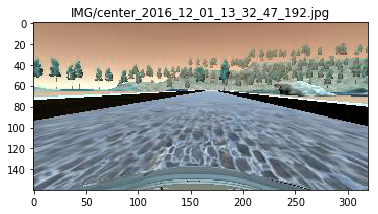

In [29]:

# Prepare a random image from the above sub-set to visualize

def visualize_image_from(filepaths, labels):
    index = np.random.randint(0, len(filepaths))   
    image_filepath = filepaths[index]
    image_label = labels[index]
    image = cv2.imread('data/fromudacity/'+image_filepath)
    
    debugLog(image_filepath)
    debugLog(index)
    debugLog(image.shape) 
    debugLog(image.dtype) 
    debugLog(image_label)
    
    plt.title(image_filepath)
    plt.imshow(image) 
    

visualize_image_from(subset_training_features_paths,subset_training_labels)


In [17]:
# Log pixel intensities to visualize whether they have been normalized or not

debugLog(subset_training_features_images[0])


[[[ 130.  163.  208.]
  [ 130.  163.  208.]
  [ 130.  163.  208.]
  ..., 
  [ 131.  163.  210.]
  [ 131.  163.  210.]
  [ 131.  163.  210.]]

 [[ 130.  163.  208.]
  [ 130.  163.  208.]
  [ 130.  163.  208.]
  ..., 
  [ 131.  163.  210.]
  [ 131.  163.  210.]
  [ 131.  163.  210.]]

 [[ 131.  164.  209.]
  [ 131.  164.  209.]
  [ 131.  164.  209.]
  ..., 
  [ 132.  164.  211.]
  [ 132.  164.  211.]
  [ 132.  164.  211.]]

 ..., 
 [[ 112.   99.   83.]
  [ 117.  104.   88.]
  [ 119.  106.   89.]
  ..., 
  [ 135.  116.   99.]
  [ 142.  123.  106.]
  [ 147.  128.  111.]]

 [[ 122.  109.   92.]
  [ 118.  105.   88.]
  [ 112.   99.   82.]
  ..., 
  [ 144.  123.  104.]
  [ 136.  115.   96.]
  [ 131.  110.   91.]]

 [[ 117.  104.   87.]
  [ 109.   96.   79.]
  [ 111.   95.   79.]
  ..., 
  [ 155.  134.  115.]
  [ 146.  125.  106.]
  [ 139.  118.   99.]]]


---
## Step 1: Model Architecture

In [ ]:
# 3. Create a very simple CNN architecture ( no dropout needed at this stage ), ao that you can quickly test this 
# against simulator, or predictions against 3 / 4 test images for whom the different steering angles are already known.
# This will help in quickly validating the end to end pipeline functionality, which can then be iterated upon.

In [ ]:
# Useful API Docs for Keras 1.2.1

# Convolution2D
# keras.layers.convolutional.Convolution2D(nb_filter, nb_row, nb_col, init='glorot_uniform', activation=None, 
# weights=None, border_mode='valid', subsample=(1, 1), dim_ordering='default', W_regularizer=None, 
# b_regularizer=None, activity_regularizer=None, W_constraint=None, b_constraint=None, bias=True)



In [ ]:
# 4.1 Add a preprocesing lambda layer at the start of the model, to apply normalization.
# 4.2 Add another lambda layer at the start of the model, such that it reshapes the image to a smaller input image
# with lower dimensions, and less number of features. This might make the training process faster.
# 4.3 Add another lambda layer to the model, to apply region of interest selection to the input image(s).

In [ ]:
# 5. For each category of data, shuffle the data, and split the data into train and validation (70:30)

In [ ]:
# 6. Use the Fit Generator method to fit the training data to the model, then evaluate it's validation accuracy
# It might be beneficial to use Amazon GPUs to do this training to achieve faster running times and quicker results.
# At a minimum at least setup the GPU environment to ensure it is available as and when needed.

In [ ]:
# 7. Run this for, say 7 epochs to see the trends in training accuracy versus validation accuracy and also the loss.

In [ ]:
# 8. If training accuracy / validation accuracy meet some criteria, then save this model to Disk 

In [ ]:
# 9. Once model has been saved, try using this model for autonomous driving and see the performance.

In [ ]:
# 10. Completes setup of the basic pipeline. The next objective is to work on the 'reference' model architecture
# This can be achieved, by taking a well proven model architecture ( e.g. VGGNet or GoogleNet ), and then 
# transfer learning it. This is needed, so that we can have a good reference architecure. Once you achieve
# seriously good results with this architecture, you can proceed further. This is also needed so that
# once the architecture is frozen, we can train the model in phases across different data sets, one day at a time
# and if our model architecture does not change, then we should be able to leverage a previously stored model
# and carry forward.

In [ ]:
# 11. Pick a slightly different data set ( different than the one loaded in #2), and then repeat step(s) 2 to 9 in a 
# manner such that the model gets sufficiently trained for this data set as well. This might need more / less number
# of epochs than the previous epochs.

In [ ]:
# 12. Review the results like training accuracy after # 11, and if all is good, save the model again. 

In [ ]:
# 13. As per the results, keep updating the model ( with say drop out / l2 / pooling at each layer, or other enhancements )
# so that it's performance improves.

In [ ]:
# 14. Repeat #11 - #13, until you start achieving sufficient generalization and at least one complete run 
# on the training track #1, 

In [ ]:
# 15. At this stage start work on the write up, and the read me file(s) for submission.

In [ ]:
# 16. Continue testing the model, in autonomous mode, for track 2, to review it's performance / generalization there.